In [1]:
try:
    from imports import *
except ModuleNotFoundError:
    import sys; sys.path.append("../../")
    from imports import *

# Introduction

In [5]:
os.makedirs("assets", exist_ok=True)

In [8]:
t1 = pd.read_csv("compute.csv", header=1, names=["year", "performance"])
t2 = pd.read_csv("memory.csv", header=1, names=["year", "performance"])
t3 = pd.DataFrame({"model": ["P100", "V100", "A100", "H100", "BW"],
                   "year": [2016, 2018, 2020, 2022, 2024],
                   "fp16": [21.2, 125, 312, 1979/2, 5000/2],
                   "memory": [732, 900, 1600, 3350, 8000]})
with plt.style.context(["science", "scatter", style]):
    w, h = style["figure.figsize"]
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(w, h / 2))
    fig.subplots_adjust(wspace=0.4)
    ax1.plot(t1["year"], t1["performance"], label="Compute", marker="s", markersize=4, markeredgewidth=0.25, markeredgecolor='black')
    ax1.plot(t2["year"], t2["performance"], label="Memory", marker="o", markersize=4, markeredgewidth=0.25, markeredgecolor='black')
    ax1.set_yscale('log'); ax1.set_xlim((1980, 2001))
    ax1.yaxis.set_major_formatter("{x:.0f}")
    ax1.set_xlabel(r"Year"); ax1.set_ylabel("Relative performance")
    ax1.grid(); ax1.legend(title="CPUs", handlelength=0.5, handletextpad=0.5)
    
    ax2.plot(t3["year"], t3["fp16"] / t3["fp16"][0], label="Compute", marker="s", markersize=4, markeredgewidth=0.25, markeredgecolor='black')
    ax2.plot(t3["year"], t3["memory"] / t3["memory"][0], label="Memory", marker="o", markersize=4, markeredgewidth=0.25, markeredgecolor='black')
    ax2.set_yscale('log'); ax2.set_xlim((2015.8, 2024.2)); ax2.yaxis.set_major_formatter("{x:.0f}")
    ax2.xaxis.set_ticks([2016, 2018, 2020, 2022, 2024])
    ax2.set_xlabel(r"Year"); ax2.set_ylabel("Relative performance")
    ax2.grid(); ax2.legend(title="Nvidia GPUs", handlelength=0.5, handletextpad=0.5)
    
    fig.savefig("assets/Figure_1.pgf", backend="pgf")
fig

OSError: [Errno 30] Read-only file system: 'assets/Figure_1.pgf'

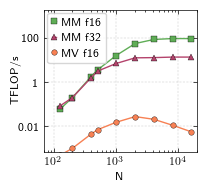

In [7]:
t = pd.read_csv("matmul.csv")
with plt.style.context(["science", "scatter", style]):
    fig, ax = plt.subplots(figsize=(0.4 * 4.921259842519685, 3.690944881889764 / 2))
    fig.subplots_adjust(wspace=0.4)
    ax.plot(t["n"], t["mm16"], label="MM f16", marker="s", markersize=4, markeredgewidth=0.25, markeredgecolor='black')
    ax.plot(t["n"], t["mm32"], label="MM f32", marker="^", markersize=4, markeredgewidth=0.25, markeredgecolor='black')
    ax.plot(t["n"], t["mv16"], label="MV f16", marker="o", markersize=4, markeredgewidth=0.25, markeredgecolor='black')
    ax.set_xscale('log'); ax.set_yscale('log')
    ax.set_xlim((7e1, 2e4)); ax.set_ylim((7e-4, 2e3)); ax.yaxis.set_major_formatter("{x:g}")
    # ax1.yaxis.set_major_formatter("{x:.0f}")
    ax.set_xlabel(r"N"); ax.set_ylabel("TFLOP/s", labelpad=-2)
    ax.grid(); ax.legend(loc="upper left", borderaxespad=0.3, handlelength=0.4, handletextpad=0.5)
    fig.savefig("assets/Figure_2.pgf", backend="pgf")
fig